<a href="https://colab.research.google.com/github/lfmarin/clases-ia/blob/main/signal_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales para series de tiempo.

Se quiere hacer la identificación de una señal y tomamos una senoidal como nuestra señal a identificar

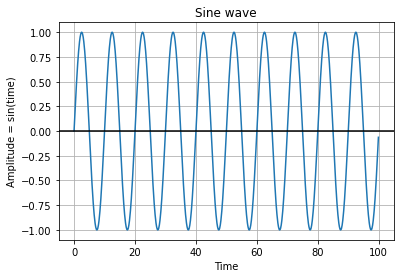

(1000, 1)

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

 
time        = np.arange(0, 100, 0.1)

frequency = .1

theta = 0
amplitude =  np.sin(2 * np.pi * frequency * time + theta)
#amplitude   = np.sin(time)

plt.plot(time, amplitude)
plt.title('Sine wave')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
np.expand_dims(amplitude, axis=1).shape


Al ser las redes neuronales un algoritmo supervisado requerimos generar el conjunto de entrenamiento por medio de ventanas desplazantes a lo largo de la serie de tiempo:

*** Con esto reconocemos el patrón de la señal ***


---


tamaño de la ventana o input = 3

tamaño del horizonte o label = 1


**[t, t+1, t+2] -> [t+3]**



In [ ]:
x_amp =[] # ventanas
y_amp = [] # horizontes
for i in range(len(amplitude)-3):
  x_amp.append(amplitude[i:i+3])
  y_amp.append(amplitude[i+3])
 # print(amplitude[i:i+3],amplitude[i+4])
x_amp = np.array(x_amp)
y_amp = np.array(y_amp)
print(amplitude[0],amplitude[1],amplitude[2])
print(amplitude[4])
print(x_amp[0], y_amp[0])
#[0.         0.09983342 0.19866933] 0.3894183423086505



0.0 0.06279051952931337 0.12533323356430426
0.2486898871648548
[0.         0.06279052 0.12533323] 0.18738131458572463


la variable de horizontes nos queda un poco más corta debido a que empezamos a guardar a partir del elemento con índice 3 (el 4to elemento)

[0.06279052 0.12533323 0.18738131] 0.2486898871648548


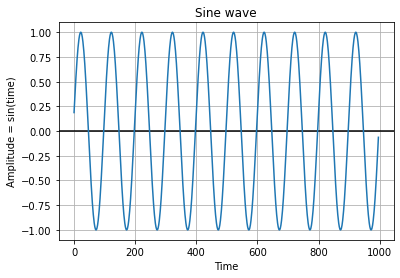

In [ ]:
print(x_amp[1], y_amp[1])
plt.title('Sine wave')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(y_amp)

In [ ]:
def make_windows(x, tam_ventana, horizonte):
  # creamos la ventana que se va a ir desplazando paso por paso
  mascara_ventana = np.expand_dims(np.arange(tam_ventana+horizonte), axis=0)


In [ ]:
np.expand_dims(np.arange(4), axis=0)
np.expand_dims(np.arange(tam_ventana+horizonte), axis=0)

array([[0, 1, 2, 3]])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, ytest = train_test_split(x_amp, y_amp, test_size=0.3, random_state=42)
split_size = int(0.7 *len(y_amp))
X_train, y_train = x_amp[:split_size], y_amp[:split_size]
X_test, ytest =  x_amp[split_size:], y_amp[split_size:]


In [ ]:
model = Sequential()

model.add(Dense(4,input_dim=3, activation="relu")) #8 características
model.add(Dense(4,activation="relu"))
#model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="tanh"))
#MAE MSE
model.compile(optimizer = 'adam', loss = 'MAE')#, metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, ytest), batch_size=10, epochs=500)

Epoch 1/500
70/70 [==============================] - 1s 9ms/step - loss: 0.3502 - val_loss: 0.2496
Epoch 2/500
70/70 [==============================] - 1s 11ms/step - loss: 0.1950 - val_loss: 0.1530
Epoch 3/500
70/70 [==============================] - 1s 8ms/step - loss: 0.1377 - val_loss: 0.1278
Epoch 4/500
70/70 [==============================] - 1s 8ms/step - loss: 0.1229 - val_loss: 0.1174
Epoch 5/500
70/70 [==============================] - 0s 6ms/step - loss: 0.1117 - val_loss: 0.1064
Epoch 6/500
70/70 [==============================] - 0s 5ms/step - loss: 0.1020 - val_loss: 0.0965
Epoch 7/500
70/70 [==============================] - 0s 6ms/step - loss: 0.0909 - val_loss: 0.0855
Epoch 8/500
70/70 [==============================] - 0s 6ms/step - loss: 0.0820 - val_loss: 0.0790
Epoch 9/500
70/70 [==============================] - 1s 7ms/step - loss: 0.0779 - val_loss: 0.0768
Epoch 10/500
70/70 [==============================] - 0s 7ms/step - loss: 0.0753 - val_loss: 0.0738
Epoch 11

In [ ]:
import pandas as pd

In [ ]:
losses = pd.DataFrame(history.history)
#losses.accuracy.plot()
#losses.val_accuracy.plot()

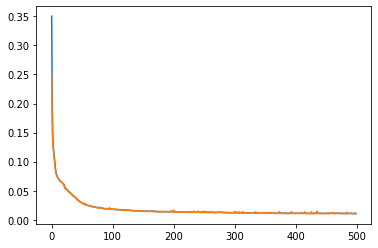

In [ ]:
losses.loss.plot()
losses.val_loss.plot()

In [ ]:
predictions = model.predict(X_test)

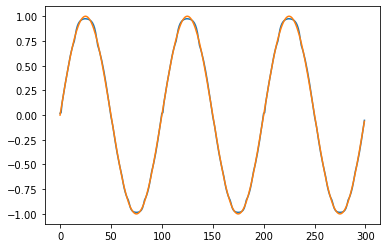

In [ ]:
plt.plot(predictions)
#plt.plot(time, amplitude)
plt.plot(ytest)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
mean_absolute_error(ytest, predictions)

0.010779888055308969